There are basically three types of recommender systems:-

Demographic Filtering- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same cosmetics to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that cosmetics that are more popular will have a higher probability of being liked by the average audience.
Content Based Filtering- They suggest similar items based on a particular item. This system uses item metadata to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
Collaborative Filtering- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

Let's load the data now.

In [ ]:
import pandas as pd
import numpy as np
df2=pd.read_csv('/cosmetics.csv')

In [ ]:
df2.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


From the above data we can infer than the mean rank or rating is 4.1.


In [ ]:
df2.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


let us find the average price and the mean rating.

In [ ]:
mean_rat=df2['Rank'].mean()

In [ ]:
mean_rat

4.153260869565218

In [ ]:
mean_price=df2['Price'].mean()
mean_price

55.58423913043478

In [ ]:
df3 = df2.sort_values('Rank', ascending=False)

In [ ]:
df3.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
618,Treatment,BIOEFFECT,EGF Serum,160,5.0,"Glycerin, Water, Sodium Hyaluronate, Trometham...",1,1,1,1,1
966,Face Mask,SEPHORA COLLECTION,Sleeping Mask - Coconut Water,4,5.0,"Water, Butylene Glycol, Glycerin, Betaine, Phe...",1,1,1,1,1
1219,Eye cream,PERRICONE MD,Neuropeptide Firming & Illuminating Under-Eye ...,170,5.0,"Water, Butylene Glycol, Glycerin, Dimethicone,...",1,1,1,1,0
1003,Face Mask,FOREO,H2Overdose Mask,19,5.0,-Hyaluronic Acid -Ceramide,1,1,1,1,1
228,Moisturizer,DIOR,Capture Totale Multi-Perfection Creme Refill,140,5.0,Visit the Dior boutique,0,0,0,0,0


In [ ]:
df3.head(15)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
618,Treatment,BIOEFFECT,EGF Serum,160,5.0,"Glycerin, Water, Sodium Hyaluronate, Trometham...",1,1,1,1,1
966,Face Mask,SEPHORA COLLECTION,Sleeping Mask - Coconut Water,4,5.0,"Water, Butylene Glycol, Glycerin, Betaine, Phe...",1,1,1,1,1
1219,Eye cream,PERRICONE MD,Neuropeptide Firming & Illuminating Under-Eye ...,170,5.0,"Water, Butylene Glycol, Glycerin, Dimethicone,...",1,1,1,1,0
1003,Face Mask,FOREO,H2Overdose Mask,19,5.0,-Hyaluronic Acid -Ceramide,1,1,1,1,1
228,Moisturizer,DIOR,Capture Totale Multi-Perfection Creme Refill,140,5.0,Visit the Dior boutique,0,0,0,0,0
177,Moisturizer,NURSE JAMIE,Tech Neck Prevention Kit,69,5.0,-Silicone Wrap: Creates a hydrating climate fo...,0,0,0,0,0
755,Treatment,DR. DENNIS GROSS SKINCARE,Doctor's Kit Gold Standard Anti-Aging Solution,59,5.0,Visit the Dr. Dennis Gross Skincare boutique,1,1,1,1,1
999,Face Mask,AMOREPACIFIC,TIME RESPONSE Vintage Wash-off Masque,170,5.0,"Camellia Sinensis Leaf Water, Propanediol, Gly...",1,1,1,1,0
830,Face Mask,SEPHORA COLLECTION,Face Mask Magic,25,5.0,"Coconut Face Mask: Water, Butylene Glycol, Gly...",1,1,1,1,1
1458,Sun protect,COOLA,Sport Continuous Spray SPF 30 - Unscented,32,5.0,"Alcohol (Organic), Algae Extract (Organic), Al...",1,1,1,1,1


We have made our first(though very basic) recommender. Under the Trending Now tab of these systems we find cosmetic that are very popular and they can just be obtained by sorting the dataset by the popularity column.

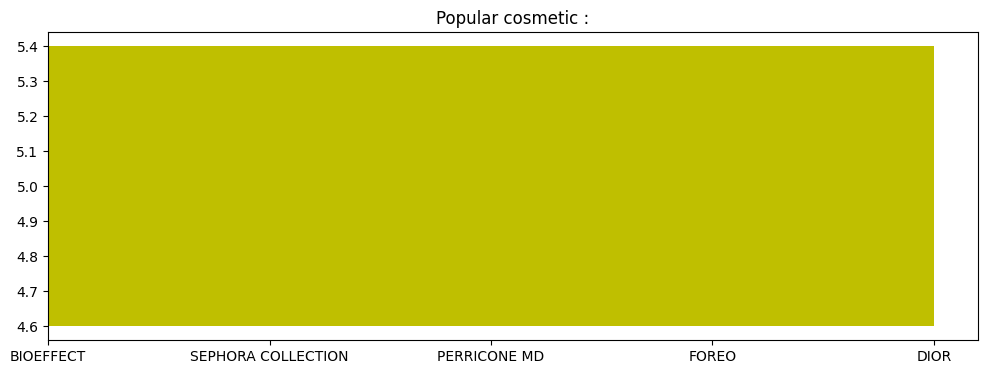

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.barh(df3['Rank'].head(5),df3['Brand'].head(5),color='y')
plt.title("Popular cosmetic :")
plt.show()

Now something to keep in mind is that these demographic recommender provide a general chart of recommended cosmetic to all the users. They are not sensitive to the interests and tastes of a particular user. This is when we move on to a more refined system- Content Basesd Filtering.



A Content-Based Recommender works by the data that we take from the user, either explicitly (rating) or implicitly (clicking on a link). By the data we create a user profile, which is then used to suggest to the user, as the user provides more input or take more actions on the recommendation, the engine becomes more accurate.

We will compute pairwise similarity scores for all cosmentics based on their ingredients and recommend based on the similarity score

In [ ]:
df4=df3

In [ ]:
df4['Ingredients'].head(5)

618     Glycerin, Water, Sodium Hyaluronate, Trometham...
966     Water, Butylene Glycol, Glycerin, Betaine, Phe...
1219    Water, Butylene Glycol, Glycerin, Dimethicone,...
1003                           -Hyaluronic Acid -Ceramide
228                               Visit the Dior boutique
Name: Ingredients, dtype: object

For any of you who has done even a bit of text processing before knows we need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['Ingredients'] = df4['Ingredients'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df4['Ingredients'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(1472, 4450)

We see that over 4456 different words were used to describe the 1472 cosmetics in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

Cosine similarity score

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and cosmetic titles
indices = pd.Series(df4.index, index=df4['Name']).drop_duplicates()

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df4['Name'].iloc[movie_indices]

In [ ]:
get_recommendations('EGF Serum')


272                              5 in 1 Face Cream SPF 30
680                                 Pore Treatment Strips
837                                         Overtime Mask
1364    Ultimate Sun Protection Spray Broad Spectrum S...
213                            Crème Ancienne® Soft Cream
1030                    Shake & Shot™ Rubber Firming Mask
868                   White Lucent Power Brightening Mask
418                      Wild Rose Foaming Cream Cleanser
971                      Clarifying Colloidal Sulfur Mask
159                       Abeille Royale Youth Watery Oil
Name: Name, dtype: object

In [ ]:
get_recommendations('White Lucent Power Brightening Mask')

1176                                               #NAME?
109     Sleep Tight Firming Night Balm with Echinacea ...
287                  POWER Recharging Night Pressed Serum
125                            Daily Reviving Concentrate
708               Younger® Pure Youth Serum with MIMIXYL™
111                  Phoenix Cell Regenerating Facial Oil
11                          Midnight Recovery Concentrate
76                         Seaberry Moisturizing Face Oil
145                                    Noni Glow Face Oil
818                        Crème Ancienne Face Oil Elixir
Name: Name, dtype: object